In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2025-06-21 18:10:34.703303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750504234.747617    5097 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750504234.767937    5097 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750504234.813720    5097 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750504234.813759    5097 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750504234.813762    5097 computation_placer.cc:177] computation placer alr

In [2]:
folder_path = os.getcwd()
ws_path = os.path.dirname(folder_path)

list_dir = os.listdir(ws_path)
prepro_data_path = ws_path + '/preproDataset'
nor_prepro_path = prepro_data_path + '/normal'
vsd_prepro_path = prepro_data_path + '/vsd'

In [3]:
from tensorflow.keras.models import load_model

model = load_model('best_vgg16_vsd_model.h5')
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    ws_path + '/preproDataset', 
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
# Evaluasi akurasi dan loss
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

I0000 00:00:1750504244.121074    5097 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1989 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Found 674 images belonging to 2 classes.


/home/daffin_tw/python-environments/tf219/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1750504247.565698    5175 service.cc:152] XLA service 0x71a7000017f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750504247.565749    5175 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-06-21 18:10:47.593074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750504247.861079    5175 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-21 18:10:49.440163: I 

21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9306 - loss: 0.5952

2025-06-21 18:11:32.409816: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.39 = (f32[2,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,3,224,224]{3,2,1,0} %bitcast.711, f32[64,3,3,3]{3,2,1,0} %bitcast.718, f32[64]{0} %bitcast.720), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/block1_conv1_1/convolution" source_file="/home/daffin_tw/python-environments/tf219/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-21 18:11:32.913524: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc

22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 523ms/step - accuracy: 0.9229 - loss: 0.5964
Validation Loss: 0.6084
Validation Accuracy: 0.8427


22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step
              precision    recall  f1-score   support

      normal       0.78      0.96      0.86       337
         vsd       0.95      0.72      0.82       337

    accuracy                           0.84       674
   macro avg       0.86      0.84      0.84       674
weighted avg       0.86      0.84      0.84       674



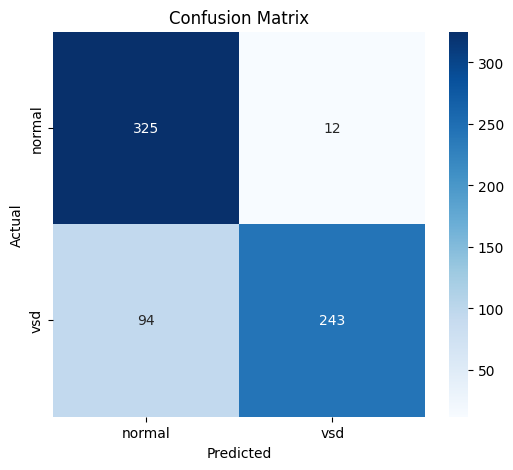

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
preds = model.predict(val_generator)
predicted_classes = (preds > 0.5).astype(int).flatten()

# Label asli
true_classes = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Report
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
325 / (325+94+12+243) # P(AN)
94 / (325+94+12+243) # P(PN)

0.1394658753709199

In [ ]:
# Prediksi Normal pelluang Asli Normal
325/(325+94) # P(AN | PN)

0.7756563245823389

In [ ]:
# Asli Normal pelluang Prediksi Normal
325/(12+325) # P(PN | AN)

0.9643916913946587

In [ ]:
# Prediksine VSD Peluang asli VSD
243/(12+243) # P(AV | PV)

0.9529411764705882

In [ ]:
# Asli VSD pelluang Prediksi VSD
243/(94+243) # P(PV | AV)

0.7210682492581603

In [22]:
325/(325+12)

0.9643916913946587

In [19]:
12/(12+243)

0.047058823529411764

In [20]:
243/(94+243)

0.7210682492581603

In [17]:
94/(94+243)

0.2789317507418398

In [11]:
12/(12+243)

0.047058823529411764

In [13]:
94/(94+325)

0.2243436754176611